In [70]:
% matplotlib inline
% load_ext autoreload
% autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [71]:
from __future__ import print_function
import tensorflow as tf
import numpy as np
from deep_visual_odometry.kitti_utils import KITTIdata
from matplotlib import pyplot as plt

In [72]:
basedir = 'dataset'
kitti_data = KITTIdata(basedir, sequences = ['01'], img_size=(150,50))

completed load sequence 01 data


KeyError: '00'

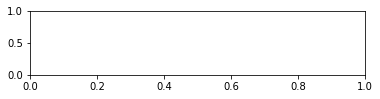

In [74]:
plt.figure()
ylabels = ['x','y','theta']
for i in range(3):
    plt.subplot(3,1, i+1)
    plt.plot(kitti_data.poses['00'][:,i])
    plt.ylabel(ylabels[i])
plt.tight_layout()

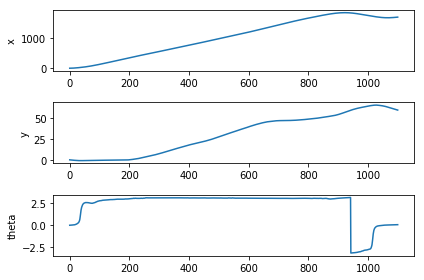

In [73]:
plt.figure()
ylabels = ['x','y','theta']
for i in range(3):
    plt.subplot(3,1, i+1)
    plt.plot(kitti_data.poses['01'][:,i])
    plt.ylabel(ylabels[i])
plt.tight_layout()

In [75]:
inputs, velocities = kitti_data.load_data_input_model()

In [77]:
np.random.seed(100)
mask = np.arange(inputs.shape[0])
np.random.shuffle(mask)
inputs = inputs[mask]
velocities = velocities[mask]
num_validation = int(inputs.shape[0]/15)
num_training = inputs.shape[0] - num_validation

X_train, y_train = inputs[:num_training], velocities[:num_training]
X_val, y_val = inputs[num_training:], velocities[num_training:]

mean_image = np.mean(X_train, axis = 0)
std_image = np.std(X_train, axis = 0)


X_train = X_train.astype(np.float32) - mean_image.astype(np.float32)
X_val = X_val.astype(np.float32) - mean_image.astype(np.float32)

X_train /= 255
X_val /= 255

mean_y = np.mean(y_train, axis = 0)
std_y = np.std(y_train, axis = 0)

y_train = y_train - mean_y
y_val = y_val - mean_y

y_train /= std_y
y_val /=std_y

print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)

(1027, 50, 150, 6)
(1027, 2)
(73, 50, 150, 6)
(73, 2)


In [81]:
from deep_visual_odometry.input_model import training
tf.reset_default_graph()
training(X_train, y_train, X_val, y_val, 
         conv_featmap=[16,16,16,16],
         fc_units=[128,128],
         conv_kernel_size=[7,5,5,5],
         pooling_size=[2,2,2,2],
         l2_norm=0.01,
         seed=235,
         learning_rate=1e-4,
         epoch=200,
         batch_size=100,
         verbose=False,
         pre_trained_model=None)

Building velocity CNN. Parameters: 
conv_featmap=[16, 16, 16, 16]
fc_units=[128, 128]
conv_kernel_size=[7, 5, 5, 5]
pooling_size=[2, 2, 2, 2]
l2_norm=0.01
seed=235
learning_rate=0.0001
number of batches for training: 10
epoch 1 
epoch 2 
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
Best validation mse! iteration:100 val_mse: 0.8082320094108582
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
Best validation mse! iteration:200 val_mse: 0.8008365035057068
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
epoch 51 
epoch 52 
epoch 53 
epoch 54 
epoch 55 
epoch 56 
epoch 57 
epoch 58 
epoch 59 
epoch 60 
epoch 61 
epoch 62 
epoch 63 
epoch 64 
epoch 65 
epoch 66 
epo

In [38]:
from deep_visual_odometry.input_model import test_input_model
out = test_input_model("CNN_Velocity_Model",X_val,y_val)

INFO:tensorflow:Restoring parameters from model/CNN_Velocity_Model


In [50]:
error = out-y_val
print(f'recalculated validation mse is {np.linalg.norm(error)/num_validation}')
print(f'validation mse if the rotational part is ignored {np.linalg.norm(error[:,0])/num_validation}')
      

recalculated validation mse is 0.045310675659750416
validation mse if the rotational part is ignored 0.01091451498558482


In [51]:
out = test_input_model("CNN_Velocity_Model",X_val,y_val)

INFO:tensorflow:Restoring parameters from model/CNN_Velocity_Model


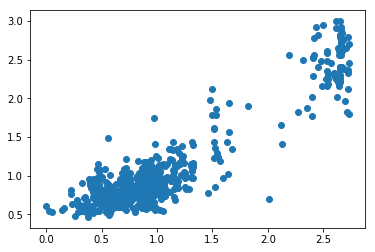

In [10]:
plt.scatter(y_val[:,0],out[:,0])
plt.show()

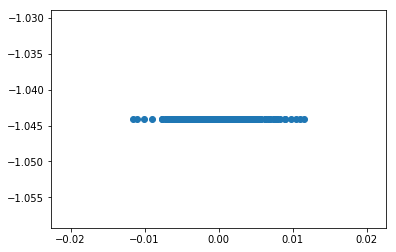

In [11]:
plt.scatter(y_val[:,1],out[:,1])
plt.show()

In [12]:
out[:,1]

array([-1.0440965, -1.0440965, -1.0440965, -1.0440965, -1.0440965,
       -1.0440965, -1.0440965, -1.0440964, -1.0440965, -1.0440965,
       -1.0440965, -1.0440965, -1.0440964, -1.0440965, -1.0440965,
       -1.0440964, -1.0440965, -1.0440965, -1.0440965, -1.0440965,
       -1.0440965, -1.0440965, -1.0440965, -1.0440965, -1.0440965,
       -1.0440965, -1.0440965, -1.0440965, -1.0440965, -1.0440965,
       -1.0440965, -1.0440965, -1.0440965, -1.0440964, -1.0440965,
       -1.0440965, -1.0440965, -1.0440965, -1.0440965, -1.0440965,
       -1.0440965, -1.0440965, -1.0440965, -1.0440965, -1.0440965,
       -1.0440964, -1.0440965, -1.0440965, -1.0440965, -1.0440965,
       -1.0440965, -1.0440964, -1.0440965, -1.0440965, -1.0440965,
       -1.0440965, -1.0440965, -1.0440965, -1.0440964, -1.0440965,
       -1.0440965, -1.0440965, -1.0440964, -1.0440965, -1.0440965,
       -1.0440965, -1.0440965, -1.0440965, -1.0440965, -1.0440965,
       -1.0440964, -1.0440965, -1.0440965, -1.0440965, -1.0440